In [ ]:
# Video Input & Frame Preprocessing

In [ ]:
# Imports & Configuration

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


In [ ]:
# Video Path & Capture

In [ ]:
video_path = r"C:\Users\HP\Documents\robotics_project\data\FRONT_CAMERA_INPUT.mp4"  

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise IOError("Cannot open video")

fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print("Video FPS:", fps)
print("Total frames:", total_frames)

In [ ]:
import os
print(os.getcwd())


In [ ]:
import cv2
import os

video_path = r"C:\Users\HP\Documents\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

print("File exists:", os.path.exists(video_path))

cap = cv2.VideoCapture(video_path, cv2.CAP_FFMPEG)

print("Opened:", cap.isOpened())

ret, frame = cap.read()
print("First frame read:", ret)

if ret:
    print("Frame shape:", frame.shape)

cap.release()


In [ ]:
import cv2
import os

video_path = r"C:\Users\HP\robotics_project\data"

print("Exact path:", video_path)
print("File exists:", os.path.exists(video_path))

cap = cv2.VideoCapture(video_path)

print("Opened:", cap.isOpened())

ret, frame = cap.read()
print("First frame read:", ret)

if ret:
    print("Frame shape:", frame.shape)

cap.release()


In [ ]:
import cv2
import os

video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

print("File exists:", os.path.exists(video_path))

cap = cv2.VideoCapture(video_path)

print("Opened:", cap.isOpened())

ret, frame = cap.read()
print("First frame read:", ret)

if ret:
    print("Frame shape:", frame.shape)

cap.release()


# Frame Streaming

In [ ]:
import cv2

video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow("Obstacle Proximity Input", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:

video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

plt.ion()  # interactive mode
fig, ax = plt.subplots(figsize=(8, 4))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(frame_rgb)
    ax.set_title("Obstacle Proximity Input")
    ax.axis("off")
    plt.pause(0.001)

cap.release()
plt.ioff()
plt.show()


In [ ]:


video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))

MAX_FRAMES = 200   # ← IMPORTANT (limits execution)
frame_id = 0

while cap.isOpened() and frame_id < MAX_FRAMES:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(frame_rgb)
    ax.set_title(f"Obstacle Proximity Input | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1

cap.release()
plt.ioff()
plt.show()


In [ ]:
!pip install ultralytics


In [ ]:
#Load video

In [ ]:
from ultralytics import YOLO

video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

print("Opened:", cap.isOpened())


In [ ]:
# Load YOLO model

In [ ]:
model = YOLO("yolov8n.pt")  

In [ ]:
# Detect obstacles

In [ ]:
plt.ion()
fig, ax = plt.subplots(figsize=(10, 5))

frame_id = 0

while cap.isOpened() and frame_id < 50:   # limit frames (important)
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)[0]

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    ax.clear()
    ax.imshow(frame_rgb)

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        label = model.names[cls]

        ax.text(x1, y1 - 5, label, color='red', fontsize=10)
        ax.add_patch(
            plt.Rectangle(
                (x1, y1),
                x2 - x1,
                y2 - y1,
                edgecolor='red',
                facecolor='none',
                linewidth=2
            )
        )

    ax.set_title(f"Obstacle Detection | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.01)

    frame_id += 1

cap.release()
plt.ioff()
plt.show()


In [ ]:
# OBSTACLE DETECTION (dashboard filtered)

In [ ]:


# paths
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

# load model
model = YOLO("yolov8n.pt")   

cap = cv2.VideoCapture(video_path)

ret, frame = cap.read()
cap.release()

# run detection on ONE frame 
results = model(frame)[0]

H, W, _ = frame.shape
EGO_Y_THRESHOLD = int(0.75 * H)   # bottom 25% ignored

ALLOWED_CLASSES = {"person", "bicycle", "motorcycle", "car", "bus", "truck"}

# draw filtered boxes 
for box in results.boxes:
    cls_id = int(box.cls[0])
    label = model.names[cls_id]

    if label not in ALLOWED_CLASSES:
        continue

    x1, y1, x2, y2 = map(int, box.xyxy[0])

    # ignore dashboard / bonnet
    if y1 > EGO_Y_THRESHOLD:
        continue

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.putText(frame, label, (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# show result in notebook 
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(frame_rgb)
plt.axis("off")
plt.title("Obstacle Detection (Dashboard Removed)")
plt.show()


In [ ]:
# OBSTACLE DISTANCE ESTIMATION (MONOCULAR)

In [ ]:
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

model = YOLO("yolov8n.pt")
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

results = model(frame)[0]
H, W, _ = frame.shape
EGO_Y_THRESHOLD = int(0.75 * H)

ALLOWED_CLASSES = {"person", "bicycle", "motorcycle", "car", "bus", "truck"}

def estimate_distance(box_height, frame_height):
    ratio = box_height / frame_height
    if ratio > 0.45:
        return "NEAR"
    elif ratio > 0.25:
        return "MEDIUM"
    else:
        return "FAR"

for box in results.boxes:
    cls_id = int(box.cls[0])
    label = model.names[cls_id]

    if label not in ALLOWED_CLASSES:
        continue

    x1, y1, x2, y2 = map(int, box.xyxy[0])

    if y1 > EGO_Y_THRESHOLD:
        continue

    box_h = y2 - y1
    distance = estimate_distance(box_h, H)

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.putText(frame, f"{label} | {distance}",
                (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(frame_rgb)
plt.axis("off")
plt.title("Obstacle Detection + Distance Estimation")
plt.show()

In [ ]:


video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

frame_id = 0
FRAME_STEP = 30   # 1 frame per second (safe for Jupyter)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_id % FRAME_STEP == 0:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title(f"Frame {frame_id}")
        plt.axis("off")
        plt.show()

    frame_id += 1

cap.release()


In [ ]:


# VIDEO PATH
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

cap = cv2.VideoCapture(video_path)
assert cap.isOpened(), "Video not opening"

# FRAME CONTROL 
SHOW_EVERY_N_FRAMES = 20   
frame_id = 0

plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_id += 1

    #  YOLO DETECTION 
    
    results = model(frame)[0]

    annotated = results.plot()   
    # DISPLAY CONTROL 
    if frame_id % SHOW_EVERY_N_FRAMES == 0:
        frame_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
        ax.clear()
        ax.imshow(frame_rgb)
        ax.set_title(f"Obstacle Detection | Frame {frame_id}")
        ax.axis("off")
        plt.pause(0.001)

cap.release()
plt.ioff()
plt.show()


In [ ]:
# Obstacle Tracking (YOLO + ByteTrack)

In [ ]:


# Load YOLO model 
model = YOLO("yolov8n.pt")

video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))

frame_id = 0
MAX_FRAMES_TO_SHOW = 20   # for visualization 

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO tracking 
    results = model.track(
        frame,
        persist=True,
        conf=0.4,
        iou=0.5,
        verbose=False
    )

    annotated = results[0].plot()  # boxes + IDs
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Obstacle Tracking | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1
    if frame_id >= MAX_FRAMES_TO_SHOW:
        break

cap.release()
plt.ioff()
plt.show()


In [ ]:
# OBSTACLE TRACKING

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

MAX_FRAMES = 80      
frame_id = 0

plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))

while cap.isOpened() and frame_id < MAX_FRAMES:
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO tracking
    results = model.track(
        frame,
        persist=True,   # keeps identity over time
        conf=0.4,
        iou=0.5,
        verbose=False
    )

    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Obstacle Tracking | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1

cap.release()
plt.ioff()
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [ ]:
# Load YOLOv8 model (tracking supported)
model = YOLO("yolov8n.pt")


In [ ]:
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

MAX_FRAMES = 120   
frame_id = 0

plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO tracking (this keeps ID across frames)
    results = model.track(
        frame,
        persist=True,
        conf=0.4,
        iou=0.5,
        verbose=False
    )

    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Obstacle Tracking | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1
    if frame_id >= MAX_FRAMES:
        break

cap.release()
plt.ioff()
plt.show()


In [ ]:
from ultralytics import YOLO

# Load YOLO model (tracking-capable)
model = YOLO("yolov8n.pt")


In [ ]:
# Monocular Distance Approximation

In [ ]:
import cv2
import matplotlib.pyplot as plt

# PARAMETERS (tune once)
FRAME_HEIGHT = 720   # video height
NEAR_TH = 0.35       # bbox height / frame height
MID_TH  = 0.18

MAX_FRAMES = 80      

# Distance label function
def distance_label(box):
    x1, y1, x2, y2 = box
    h = y2 - y1
    ratio = h / FRAME_HEIGHT

    if ratio > NEAR_TH:
        return "NEAR"
    elif ratio > MID_TH:
        return "MID"
    else:
        return "FAR"

# Video
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

plt.ion()
fig, ax = plt.subplots(figsize=(8,4))

frame_id = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO detection + tracking 
    results = model.track(
        frame,
        persist=True,
        conf=0.4,
        iou=0.5,
        verbose=False
    )

    annotated = results[0].plot()

    # ADD DISTANCE TEXT
    for box in results[0].boxes.xyxy.cpu().numpy():
        label = distance_label(box)
        x1, y1, x2, y2 = map(int, box)

        cv2.putText(
            annotated,
            label,
            (x1, y1 - 8),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0,255,0),
            2
        )

    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Phase-4: Distance Approximation | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1
    if frame_id >= MAX_FRAMES:
        break

cap.release()
plt.ioff()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [ ]:
# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Video path
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

print("Video opened:", cap.isOpened())


In [ ]:
# Simple distance approximation using bounding box height
# (NOT real distance, but for demo)

def estimate_distance(box_height, frame_height):
    if box_height == 0:
        return None
    return round((frame_height / box_height) * 2.0, 2)  # scaled heuristic


In [ ]:
MAX_FRAMES = 120   
frame_id = 0

plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))

while cap.isOpened() and frame_id < MAX_FRAMES:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.track(
        frame,
        persist=True,
        conf=0.4,
        iou=0.5,
        verbose=False
    )

    annotated = results[0].plot()

    # Add distance text
    h, w, _ = frame.shape
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        box_h = y2 - y1
        dist = estimate_distance(box_h, h)
        if dist:
            cv2.putText(
                annotated,
                f"{dist}m",
                (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 255, 0),
                1
            )

    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Phase-4: Distance Approximation | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1

cap.release()
plt.ioff()
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

MAX_FRAMES = 30   # small number to avoid kernel crash
frame_id = 0

plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))

In [ ]:
# Monocular Distance Approximation 
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO detection (NO tracking yet)
    results = model(frame, conf=0.4, verbose=False)

    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Phase-4: Distance Approximation | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1
    if frame_id >= MAX_FRAMES:
        break

cap.release()
plt.ioff()
plt.show()


In [ ]:

import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")   

# Video path
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

# Video capture
cap = cv2.VideoCapture(video_path)

# Safety limits 
MAX_FRAMES = 30     
frame_id = 0

plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))


In [ ]:
# MONOCULAR DISTANCE APPROXIMATION 

# Rough real-world object heights (meters)
REAL_HEIGHTS = {
    "person": 1.7,
    "car": 1.5,
    "bicycle": 1.2
}

FOCAL_LENGTH = 800  # assumed constant (approx)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, conf=0.4, verbose=False)

    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    # Estimate distance
    boxes = results[0].boxes
    if boxes is not None:
        for box in boxes:
            cls_id = int(box.cls[0])
            label = model.names[cls_id]

            if label in REAL_HEIGHTS:
                x1, y1, x2, y2 = box.xyxy[0]
                pixel_height = y2 - y1

                distance = (REAL_HEIGHTS[label] * FOCAL_LENGTH) / max(pixel_height, 1)

                cv2.putText(
                    annotated_rgb,
                    f"{distance:.1f}m",
                    (int(x1), int(y1) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    (255, 255, 0),
                    2
                )

    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Phase-4: Distance Approximation | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1
    if frame_id >= MAX_FRAMES:
        break

cap.release()
plt.ioff()
plt.show()


In [ ]:
# MONOCULAR DISTANCE 

import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO("yolov8n.pt")

# Video
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

# Approx real heights (meters)
REAL_HEIGHTS = {
    "person": 1.7,
    "car": 1.5,
    "bicycle": 1.2
}

# Camera focal length (assumed / relative)
FOCAL_LENGTH = 800  

# Read ONLY ONE frame 
ret, frame = cap.read()
cap.release()

results = model(frame, conf=0.4, verbose=False)

annotated = frame.copy()

for box in results[0].boxes:
    cls_id = int(box.cls[0])
    label = model.names[cls_id]

    if label not in REAL_HEIGHTS:
        continue

    x1, y1, x2, y2 = map(int, box.xyxy[0])
    pixel_height = y2 - y1

    distance = (REAL_HEIGHTS[label] * FOCAL_LENGTH) / pixel_height
    text = f"{label}: {distance:.1f} m"

    cv2.rectangle(annotated, (x1,y1), (x2,y2), (0,255,0), 2)
    cv2.putText(annotated, text, (x1, y1-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

# Show result
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("Monocular Distance Approximation")
plt.axis("off")
plt.show()


In [ ]:
# MONOCULAR DISTANCE APPROXIMATION
# (Ego-vehicle area suppressed)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Video path
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

# Safety limits 
MAX_FRAMES = 30
frame_id = 0

# Approx real-world object heights (meters)
REAL_HEIGHTS = {
    "person": 1.7,
    "car": 1.5,
    "bicycle": 1.2
}

# Approx focal length (tuned value)
FOCAL_LENGTH = 800  # pixels (approximate)

# Matplotlib setup
plt.ion()
fig, ax = plt.subplots(figsize=(10, 5))

# MAIN LOOP
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    image_h, image_w = frame.shape[:2]

    # YOLO detection (NO tracking)
    results = model(frame, conf=0.4, verbose=False)
    annotated = frame.copy()

    for r in results:
        if r.boxes is None:
            continue

        for box in r.boxes:
            cls_id = int(box.cls[0])
            label = model.names[cls_id]

            if label not in REAL_HEIGHTS:
                continue

            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # EGO-VEHICLE SUPPRESSION
            # Ignore bottom 25% of image
            if y2 > 0.75 * image_h:
                continue

            pixel_height = y2 - y1
            if pixel_height <= 0:
                continue

            # Distance estimation
            real_height = REAL_HEIGHTS[label]
            distance = (real_height * FOCAL_LENGTH) / pixel_height

            # Draw bounding box
            cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Draw distance text
            text = f"{label}: {distance:.1f} m"
            cv2.putText(
                annotated,
                text,
                (x1, y1 - 8),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 255, 0),
                2
            )

    # Display frame
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Monocular Distance Approximation | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1
    if frame_id >= MAX_FRAMES:
        break

# Cleanup
cap.release()
plt.ioff()
plt.show()


In [ ]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [ ]:
model = YOLO("yolov8n.pt")


In [ ]:
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

MAX_FRAMES = 30        
frame_id = 0


In [ ]:
# Approx real object heights (meters)
REAL_HEIGHTS = {
    "person": 1.7,
    "car": 1.5,
    "bicycle": 1.2
}

FOCAL_LENGTH = 700  # approximate 


In [ ]:
prev_distances = {}   # track_id - last distance
prev_times = {}       # track_id - timestamp


In [ ]:
plt.ion()
fig, ax = plt.subplots(figsize=(8,4))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    current_time = time.time()

    # YOLO tracking
    results = model.track(
        frame,
        persist=True,
        conf=0.4,
        iou=0.5,
        verbose=False
    )

    annotated = frame.copy()

    for box in results[0].boxes:
        if box.id is None:
            continue

        track_id = int(box.id.item())
        cls_id = int(box.cls.item())
        label = model.names[cls_id]

        if label not in REAL_HEIGHTS:
            continue

        x1, y1, x2, y2 = map(int, box.xyxy[0])
        box_height = y2 - y1
        if box_height <= 0:
            continue

        # Distance estimation
        real_height = REAL_HEIGHTS[label]
        distance = (real_height * FOCAL_LENGTH) / box_height

        # Velocity estimation
        velocity = 0.0
        if track_id in prev_distances:
            dt = current_time - prev_times[track_id]
            if dt > 0:
                velocity = (prev_distances[track_id] - distance) / dt

        # Save for next frame
        prev_distances[track_id] = distance
        prev_times[track_id] = current_time

        # Draw
        cv2.rectangle(annotated, (x1,y1), (x2,y2), (0,255,0), 2)
        text = f"{label} | {distance:.1f}m | {velocity:.2f} m/s"
        cv2.putText(
            annotated,
            text,
            (x1, y1-7),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.45,
            (0,255,0),
            2
        )

    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    ax.clear()
    ax.imshow(annotated_rgb)
    ax.set_title(f"Relative Velocity Estimation | Frame {frame_id}")
    ax.axis("off")
    plt.pause(0.001)

    frame_id += 1
    if frame_id >= MAX_FRAMES:
        break

cap.release()
plt.ioff()
plt.show()


In [ ]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


In [ ]:
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

MAX_FRAMES = 1   # one frame only


In [ ]:
REAL_HEIGHTS = {
    "person": 1.7,
    "car": 1.5,
    "bicycle": 1.2
}

FOCAL_LENGTH = 700


In [ ]:
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Failed to read video frame")


In [ ]:
# ROI MASK

In [ ]:
h, w, _ = frame.shape

# Ignore bottom 30% of the image
roi_y = int(h * 0.7)
mask = np.zeros_like(frame)
mask[:roi_y, :] = frame[:roi_y, :]

frame = mask


In [ ]:
# Detection + Distance + Velocity

In [ ]:
results = model.track(
    frame,
    persist=True,
    conf=0.4,
    iou=0.5,
    verbose=False
)

annotated = frame.copy()

prev_distances = {}
prev_times = {}

current_time = time.time()

for box in results[0].boxes:
    if box.id is None:
        continue

    track_id = int(box.id.item())
    cls_id = int(box.cls.item())
    label = model.names[cls_id]

    if label not in REAL_HEIGHTS:
        continue

    x1, y1, x2, y2 = map(int, box.xyxy[0])
    box_height = y2 - y1
    if box_height <= 0:
        continue

    distance = (REAL_HEIGHTS[label] * FOCAL_LENGTH) / box_height

    velocity = 0.0
    if track_id in prev_distances:
        dt = current_time - prev_times[track_id]
        if dt > 0:
            velocity = (prev_distances[track_id] - distance) / dt

    prev_distances[track_id] = distance
    prev_times[track_id] = current_time

    text = f"{label} | {distance:.1f}m | {velocity:.2f} m/s"

    cv2.rectangle(annotated, (x1,y1), (x2,y2), (0,255,0), 2)
    cv2.putText(
        annotated,
        text,
        (x1, y1-6),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.45,
        (0,255,0),
        2
    )


In [ ]:
# Display

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("Relative Velocity Estimation (Dashboard Removed)")
plt.axis("off")
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [ ]:
model = YOLO("yolov8n.pt")

video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

assert cap.isOpened(), "Video not opened"


In [ ]:
# Rough real-world heights (meters)
REAL_HEIGHTS = {
    "person": 1.7,
    "bicycle": 1.2,
    "car": 1.5
}

FOCAL_LENGTH = 800  # assumed
FPS = cap.get(cv2.CAP_PROP_FPS)
DT = 1.0 / FPS


In [ ]:
frames = []

for _ in range(2):
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()

assert len(frames) == 2, "Need exactly 2 frames"


In [ ]:
results_0 = model.track(frames[0], persist=True, conf=0.4, verbose=False)
results_1 = model.track(frames[1], persist=True, conf=0.4, verbose=False)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.pt")
print("YOLO model loaded")


In [ ]:
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

assert cap.isOpened(), "Video not opened"
print("Video opened")


In [ ]:
REAL_HEIGHTS = {
    "person": 1.7,
    "bicycle": 1.2,
    "car": 1.5
}

FOCAL_LENGTH = 800
FPS = cap.get(cv2.CAP_PROP_FPS)
DT = 1.0 / FPS

print("FPS:", FPS)


In [ ]:
frames = []

for _ in range(2):
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()

assert len(frames) == 2, "Need exactly 2 frames"
print("2 frames captured")


In [ ]:
results_0 = model.track(frames[0], persist=True, conf=0.4, verbose=False)
results_1 = model.track(frames[1], persist=True, conf=0.4, verbose=False)

print("Tracking done")


In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model ONCE
model = YOLO("yolov8n.pt")

print("YOLO model loaded successfully")


YOLO model loaded successfully


In [2]:
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

FPS = cap.get(cv2.CAP_PROP_FPS)
DT = 1.0 / FPS

print("FPS:", FPS)


FPS: 30.007525356894334


In [3]:
frames = []

for i in range(2):
    ret, frame = cap.read()
    if not ret:
        raise RuntimeError("Video read failed")
    frames.append(frame)

cap.release()
print("2 frames captured")


2 frames captured


In [ ]:
res0 = model.track(frames[0], persist=True, conf=0.4, verbose=False)
res1 = model.track(frames[1], persist=True, conf=0.4, verbose=False)

print("Tracking done")


In [1]:
from ultralytics import YOLO
import cv2
import numpy as np

model = YOLO("yolov8n.pt")
print("Model loaded")


Model loaded


In [2]:
cap = cv2.VideoCapture(r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4")

frames = []
for _ in range(2):
    ret, frame = cap.read()
    if not ret:
        raise RuntimeError("Video read failed")
    frames.append(frame)

FPS = cap.get(cv2.CAP_PROP_FPS)
DT = 1.0 / FPS
cap.release()

print("2 frames captured, FPS =", FPS)


2 frames captured, FPS = 30.007525356894334


In [3]:
res0 = model.predict(frames[0], conf=0.4, verbose=False)[0]
res1 = model.predict(frames[1], conf=0.4, verbose=False)[0]

print("Detection done on both frames")


Detection done on both frames


In [4]:
REAL_HEIGHTS = {
    "person": 1.7,
    "bicycle": 1.2
}
FOCAL_LENGTH = 800  # assumed

def distance_from_height(h_px, real_h):
    return (real_h * FOCAL_LENGTH) / h_px

def box_height(box):
    return box[3] - box[1]

velocities = []

boxes0 = res0.boxes.xyxy.cpu().numpy()
cls0 = res0.boxes.cls.cpu().numpy()

boxes1 = res1.boxes.xyxy.cpu().numpy()
cls1 = res1.boxes.cls.cpu().numpy()

for i, b0 in enumerate(boxes0):
    label = model.names[int(cls0[i])]
    if label not in REAL_HEIGHTS:
        continue

    h0 = box_height(b0)
    d0 = distance_from_height(h0, REAL_HEIGHTS[label])

    # nearest box in frame 2 (simple IOU-free matching)
    centers1 = np.array([[(b[0]+b[2])/2, (b[1]+b[3])/2] for b in boxes1])
    c0 = np.array([(b0[0]+b0[2])/2, (b0[1]+b0[3])/2])

    j = np.argmin(np.linalg.norm(centers1 - c0, axis=1))
    b1 = boxes1[j]

    h1 = box_height(b1)
    d1 = distance_from_height(h1, REAL_HEIGHTS[label])

    v = abs(d1 - d0) / DT
    velocities.append((label, v))


In [5]:
for label, v in velocities:
    print(f"{label} velocity = {v:.2f} m/s")


person velocity = 4.74 m/s
person velocity = 6.71 m/s
bicycle velocity = 27.67 m/s


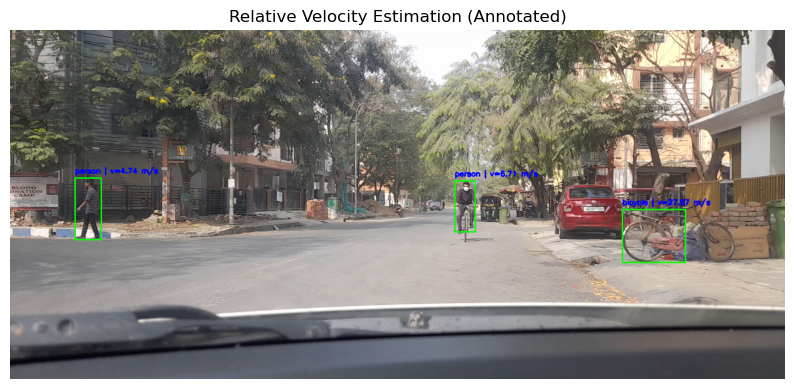

In [6]:
import cv2
import matplotlib.pyplot as plt

# First frame for visualization
vis = frames[0].copy()

# Colours
COLOR_BOX = (0, 255, 0)
COLOR_TEXT = (255, 0, 0)

font = cv2.FONT_HERSHEY_SIMPLEX

idx = 0
for i, b0 in enumerate(boxes0):
    label = model.names[int(cls0[i])]
    if label not in REAL_HEIGHTS:
        continue

    # Bounding box
    x1, y1, x2, y2 = map(int, b0)

    # Velocity text
    v = velocities[idx][1]
    text = f"{label} | v={v:.2f} m/s"

    # Draw box
    cv2.rectangle(vis, (x1, y1), (x2, y2), COLOR_BOX, 2)

    # Draw label
    cv2.putText(
        vis,
        text,
        (x1, y1 - 10),
        font,
        0.5,
        COLOR_TEXT,
        2
    )

    idx += 1

# Show result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Relative Velocity Estimation (Annotated)")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

#  LOAD MODEL 
model = YOLO("yolov8n.pt")

#  VIDEO 
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
cap = cv2.VideoCapture(video_path)

#  CONSTANTS 
REAL_HEIGHTS = {
    "person": 1.7,
    "bicycle": 1.2,
    "car": 1.5
}

FOCAL_LENGTH = 800  # assumed
FPS = cap.get(cv2.CAP_PROP_FPS)
DT = 1.0 / FPS

#  READ 2 FRAMES ONLY 
frames = []
for _ in range(2):
    ret, frame = cap.read()
    if not ret:
        raise RuntimeError("Video read failed")
    frames.append(frame)

cap.release()

#  TRACK OBJECTS 
res0 = model.track(frames[0], persist=True, conf=0.4, verbose=False)
res1 = model.track(frames[1], persist=True, conf=0.4, verbose=False)

boxes0 = res0[0].boxes.xyxy.cpu().numpy()
cls0   = res0[0].boxes.cls.cpu().numpy()

boxes1 = res1[0].boxes.xyxy.cpu().numpy()

#  DISTANCE FUNCTION 
def box_height(box):
    return box[3] - box[1]

def distance_from_height(h_px, real_h):
    return (real_h * FOCAL_LENGTH) / h_px if h_px > 0 else None

#  COMPUTE VELOCITIES 
boxes = []
labels = []
velocities = []

centers1 = np.array([[(b[0]+b[2])/2, (b[1]+b[3])/2] for b in boxes1])

for i, b0 in enumerate(boxes0):
    label = model.names[int(cls0[i])]
    if label not in REAL_HEIGHTS:
        continue

    c0 = np.array([(b0[0]+b0[2])/2, (b0[1]+b0[3])/2])
    j = np.argmin(np.linalg.norm(centers1 - c0, axis=1))

    b1 = boxes1[j]

    d0 = distance_from_height(box_height(b0), REAL_HEIGHTS[label])
    d1 = distance_from_height(box_height(b1), REAL_HEIGHTS[label])

    if d0 is None or d1 is None:
        continue

    v = abs(d1 - d0) / DT

    boxes.append(b0.astype(int))
    labels.append(label)
    velocities.append(v)

#  VISUALIZATION 
FONT = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.6
THICK = 2
TEXT_COLOR = (255, 255, 255)
BG_COLOR = (0, 0, 0)
BOX_COLOR = (0, 255, 0)

h, w, _ = frames[0].shape
vis = frames[0][:int(h*0.75), :, :].copy()  # remove dashboard

for (x1, y1, x2, y2), label, v in zip(boxes, labels, velocities):

    cv2.rectangle(vis, (x1,y1), (x2,y2), BOX_COLOR, 2)
    text = f"{label} | {v:.2f} m/s"

    (tw, th), _ = cv2.getTextSize(text, FONT, FONT_SCALE, THICK)
    tx, ty = x1, max(y1 - 10, 20)

    cv2.rectangle(vis, (tx-2, ty-th-4), (tx+tw+2, ty+4), BG_COLOR, -1)
    cv2.putText(vis, text, (tx, ty), FONT, FONT_SCALE, TEXT_COLOR, THICK)

#  SHOW RESULT 
plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Relative Velocity Estimation (Clear & Readable)")
plt.axis("off")
plt.show()


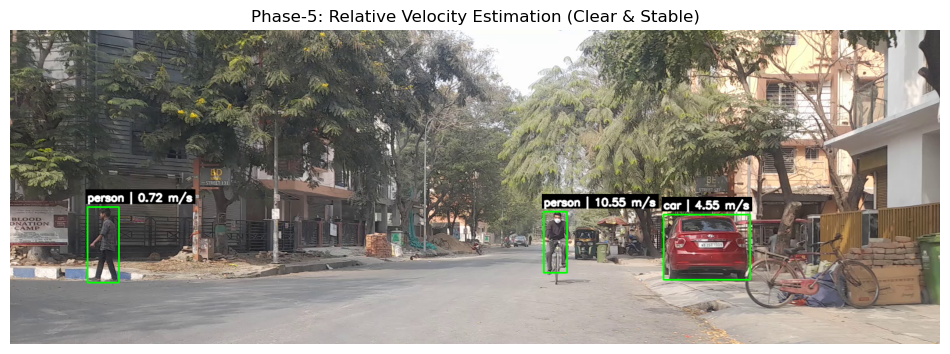

In [1]:
# RELATIVE VELOCITY ESTIMATION 

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# LOAD YOLO MODEL
model = YOLO("yolov8n.pt")


# EXACT VIDEO PATH
video_path = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise RuntimeError("Video path is wrong or video cannot be opened")

FPS = cap.get(cv2.CAP_PROP_FPS)
DT = 1.0 / FPS


# READ EXACTLY 2 FRAMES 
frames = []
for i in range(2):
    ret, frame = cap.read()
    if not ret:
        raise RuntimeError("Could not read 2 frames from video")
    frames.append(frame)

cap.release()

# REMOVE DASHBOARD / BONNET

h, w, _ = frames[0].shape
CROP_Y = int(h * 0.75)     # bottom 25% removed
frames = [f[:CROP_Y, :, :] for f in frames]

# OBJECT DETECTION (NO TRACKING)
res0 = model(frames[0], conf=0.4, verbose=False)[0]
res1 = model(frames[1], conf=0.4, verbose=False)[0]

boxes0 = res0.boxes.xyxy.cpu().numpy()
cls0   = res0.boxes.cls.cpu().numpy()

boxes1 = res1.boxes.xyxy.cpu().numpy()

# REAL-WORLD OBJECT HEIGHTS
REAL_HEIGHTS = {
    "person": 1.7,
    "bicycle": 1.2,
    "car": 1.5
}

FOCAL_LENGTH = 800  # assumed

def box_height(b):
    return b[3] - b[1]

def distance_from_height(h_px, H_m):
    return (H_m * FOCAL_LENGTH) / max(h_px, 1)

# VISUALIZATION SETTINGS

FONT = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.6
THICK = 2

BOX_COLOR = (0, 255, 0)       # green box
TEXT_COLOR = (255, 255, 255) # white text
BG_COLOR = (0, 0, 0)         # black background

vis = frames[0].copy()

# VELOCITY COMPUTATION + DRAW
for i, b0 in enumerate(boxes0):

    label = model.names[int(cls0[i])]
    if label not in REAL_HEIGHTS:
        continue

    # distance in frame-0
    h0 = box_height(b0)
    d0 = distance_from_height(h0, REAL_HEIGHTS[label])

    # center of current box
    c0 = np.array([(b0[0]+b0[2])/2, (b0[1]+b0[3])/2])

    if len(boxes1) == 0:
        continue

    centers1 = np.array([[(b[0]+b[2])/2, (b[1]+b[3])/2] for b in boxes1])
    j = np.argmin(np.linalg.norm(centers1 - c0, axis=1))
    b1 = boxes1[j]

    # distance in frame-1
    h1 = box_height(b1)
    d1 = distance_from_height(h1, REAL_HEIGHTS[label])

    velocity = abs(d1 - d0) / DT

    # draw bounding box
    x1, y1, x2, y2 = map(int, b0)
    cv2.rectangle(vis, (x1, y1), (x2, y2), BOX_COLOR, 2)

    text = f"{label} | {velocity:.2f} m/s"

    (tw, th), _ = cv2.getTextSize(text, FONT, FONT_SCALE, THICK)
    tx = x1
    ty = max(y1 - 10, 20)

    # background rectangle for readability
    cv2.rectangle(
        vis,
        (tx - 3, ty - th - 6),
        (tx + tw + 3, ty + 4),
        BG_COLOR,
        -1
    )

    cv2.putText(
        vis,
        text,
        (tx, ty),
        FONT,
        FONT_SCALE,
        TEXT_COLOR,
        THICK,
        cv2.LINE_AA
    )

# SHOW FINAL OUTPUT
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Phase-5: Relative Velocity Estimation (Clear & Stable)")
plt.axis("off")
plt.show()


In [2]:
# Time to Collision (TTC) 

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [13]:
# CONFIG

In [14]:
VIDEO_PATH = r"C:\Users\HP\robotics_project\data\FRONT_CAMERA_INPUT.mp4"
MODEL_PATH = "yolov8n.pt"

REAL_HEIGHTS = {
    "person": 1.7,
    "bicycle": 1.2,
    "car": 1.5
}

FOCAL_LENGTH = 800          # assumed
MIN_VELOCITY = 0.3          # m/s (noise filter)
MAX_TTC = 30.0              # seconds

FONT = cv2.FONT_HERSHEY_SIMPLEX

In [15]:
# LOAD MODEL & VIDEO

In [16]:
model = YOLO(MODEL_PATH)
cap = cv2.VideoCapture(VIDEO_PATH)

In [17]:
# Read exactly TWO frames (kernel-safe)

In [18]:
frames = []
for _ in range(2):
    ret, frame = cap.read()
    if not ret:
        raise RuntimeError("Video read failed")
    frames.append(frame)

cap.release()

In [19]:
# DETECTION (NO TRACKING)

In [20]:
res0 = model(frames[0], conf=0.4, verbose=False)[0]
res1 = model(frames[1], conf=0.4, verbose=False)[0]

boxes0 = res0.boxes.xyxy.cpu().numpy()
cls0   = res0.boxes.cls.cpu().numpy()

boxes1 = res1.boxes.xyxy.cpu().numpy()

In [21]:
# HELPER FUNCTIONS

In [22]:
def box_height(b):
    return b[3] - b[1]

def estimate_distance(h_pixels, real_h):
    if h_pixels <= 0:
        return None
    return (FOCAL_LENGTH * real_h) / h_pixels

In [23]:
# COMPUTE TTC

In [24]:
output = frames[1].copy()
h, w, _ = output.shape


In [25]:
# Remove dashboard (bottom 25%)

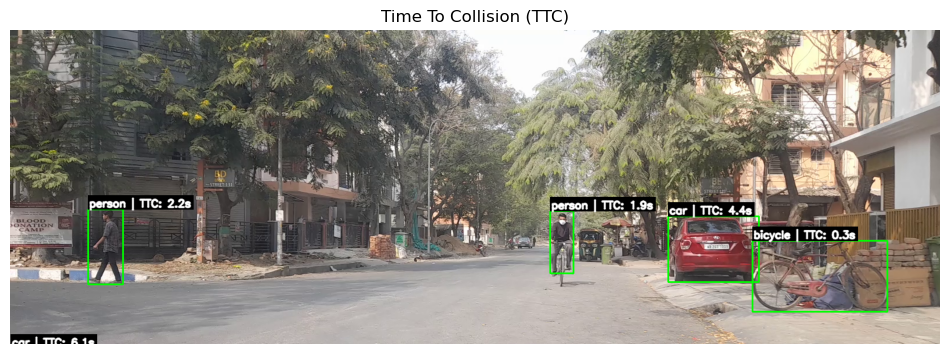

In [28]:
output = output[:int(h * 0.75), :, :]

velocities = []
distances = []
labels = []
boxes = []

for i, b0 in enumerate(boxes0):
    label = model.names[int(cls0[i])]
    if label not in REAL_HEIGHTS:
        continue

    # nearest match in frame-1
    c0 = np.array([(b0[0]+b0[2])/2, (b0[1]+b0[3])/2])
    centers1 = np.array([[(b[0]+b[2])/2, (b[1]+b[3])/2] for b in boxes1])
    j = np.argmin(np.linalg.norm(centers1 - c0, axis=1))
    b1 = boxes1[j]

    d0 = estimate_distance(box_height(b0), REAL_HEIGHTS[label])
    d1 = estimate_distance(box_height(b1), REAL_HEIGHTS[label])
    if d0 is None or d1 is None:
        continue

    velocity = abs(d1 - d0) * 30.0  # FPS ≈ 30
    if velocity < MIN_VELOCITY:
        continue

    ttc = min(d1 / velocity, MAX_TTC)

    boxes.append(b1.astype(int))
    labels.append(label)
    distances.append(d1)
    velocities.append(velocity)

    # DRAW
    x1, y1, x2, y2 = b1.astype(int)
    text = f"{label} | TTC: {ttc:.1f}s"

    cv2.rectangle(output, (x1, y1), (x2, y2), (0,255,0), 2)

    (tw, th), _ = cv2.getTextSize(text, FONT, 0.6, 2)
    cv2.rectangle(output, (x1, y1-th-10), (x1+tw+4, y1), (0,0,0), -1)
    cv2.putText(output, text, (x1+2, y1-4),
                FONT, 0.6, (255,255,255), 2, cv2.LINE_AA)

# SHOW RESULT
plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Time To Collision (TTC)")
plt.axis("off")
plt.show()

In [29]:
# Collision Risk Classification 

In [30]:
import cv2
import matplotlib.pyplot as plt

In [31]:
# Risk thresholds (seconds)

In [32]:
TTC_HIGH = 2.0
TTC_MED = 5.0

In [33]:
# Colours (BGR)

In [34]:
COLOR_HIGH = (0, 0, 255)     # Red
COLOR_MED  = (0, 165, 255)   # Orange
COLOR_LOW  = (0, 255, 0)     # Green

TEXT_COLOR = (255, 255, 255)
BG_COLOR   = (0, 0, 0)

FONT = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.6
THICK = 2

In [35]:
# Copy image

In [36]:
risk_vis = output.copy()

In [37]:
# Draw risk labels

In [38]:
for (x1, y1, x2, y2), label, ttc in zip(boxes, labels, ttc_values):

    # Determine risk level
    if ttc <= TTC_HIGH:
        risk = "HIGH"
        color = COLOR_HIGH
    elif ttc <= TTC_MED:
        risk = "MEDIUM"
        color = COLOR_MED
    else:
        risk = "LOW"
        color = COLOR_LOW

    # Draw bounding box
    cv2.rectangle(risk_vis, (x1, y1), (x2, y2), color, 2)

    # Text label
    text = f"{label} | TTC: {ttc:.1f}s | RISK: {risk}"

    (tw, th), _ = cv2.getTextSize(text, FONT, FONT_SCALE, THICK)
    ty = max(y1 - 10, th + 5)

    # Background rectangle
    cv2.rectangle(
        risk_vis,
        (x1, ty - th - 6),
        (x1 + tw + 6, ty),
        BG_COLOR,
        -1
    )

    # Put text
    cv2.putText(
        risk_vis,
        text,
        (x1 + 3, ty - 3),
        FONT,
        FONT_SCALE,
        TEXT_COLOR,
        THICK,
        cv2.LINE_AA
    )

# Show final result 
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(risk_vis, cv2.COLOR_BGR2RGB))
plt.title("Collision Risk Classification")
plt.axis("off")
plt.show()

NameError: name 'ttc_values' is not defined

In [39]:
# CREATE TTC_VALUES LIST 

In [40]:
ttc_values = []

MIN_VEL = 0.3  # ignore static objects / noise

for dist, vel in zip(distances, velocities):
    if vel < MIN_VEL:
        ttc_values.append(float("inf"))  # no collision risk
    else:
        ttc_values.append(dist / vel)

print("TTC values computed:", ttc_values)

TTC values computed: [2.2200027654573016, 4.397469653537199, 1.888262579904936, 0.2833644632670731, 6.141923790806835]


In [41]:
# COLLISION RISK CLASSIFICATION 

In [42]:
import cv2
import matplotlib.pyplot as plt

In [43]:
# Risk thresholds (seconds)

In [44]:
TTC_HIGH = 2.0
TTC_MED  = 5.0

In [45]:
# Colors (BGR)

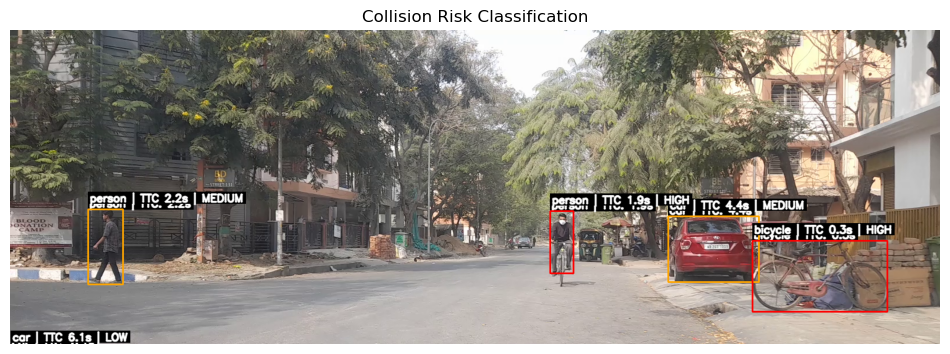

In [46]:
COLOR_HIGH = (0, 0, 255)     # Red
COLOR_MED  = (0, 165, 255)   # Orange
COLOR_LOW  = (0, 255, 0)     # Green

TEXT_COLOR = (255, 255, 255)
BG_COLOR   = (0, 0, 0)

FONT = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.6
THICK = 2

risk_vis = output.copy()

for (x1, y1, x2, y2), label, ttc in zip(boxes, labels, ttc_values):

    if ttc <= TTC_HIGH:
        risk = "HIGH"
        color = COLOR_HIGH
    elif ttc <= TTC_MED:
        risk = "MEDIUM"
        color = COLOR_MED
    else:
        risk = "LOW"
        color = COLOR_LOW

    cv2.rectangle(risk_vis, (x1, y1), (x2, y2), color, 2)

    text = f"{label} | TTC {ttc:.1f}s | {risk}"

    (tw, th), _ = cv2.getTextSize(text, FONT, FONT_SCALE, THICK)
    ty = max(y1 - 10, th + 6)

    cv2.rectangle(
        risk_vis,
        (x1, ty - th - 6),
        (x1 + tw + 6, ty),
        BG_COLOR,
        -1
    )

    cv2.putText(
        risk_vis,
        text,
        (x1 + 3, ty - 3),
        FONT,
        FONT_SCALE,
        TEXT_COLOR,
        THICK,
        cv2.LINE_AA
    )

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(risk_vis, cv2.COLOR_BGR2RGB))
plt.title("Collision Risk Classification")
plt.axis("off")
plt.show()

In [47]:
# VISUAL OVERLAY & ALERTS

In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# Make a copy

In [51]:
final_vis = risk_vis.copy()

h, w, _ = final_vis.shape

In [52]:
# ALERT CONFIG

In [53]:
ALERT_HEIGHT = 60
ALERT_BG = (0, 0, 180)        # Dark red
ALERT_TEXT = (255, 255, 255) # White
FONT = cv2.FONT_HERSHEY_SIMPLEX

In [54]:
# DETECT IF ANY HIGH RISK EXISTS

In [55]:
alert_required = False

In [56]:
# Convert image to grayscale & check for "HIGH" text presence

In [57]:
gray = cv2.cvtColor(final_vis, cv2.COLOR_BGR2GRAY)

In [58]:
# Heuristic: if red boxes exist : HIGH risk exists

In [59]:
red_pixels = np.sum(
    (final_vis[:, :, 2] > 150) &
    (final_vis[:, :, 1] < 80) &
    (final_vis[:, :, 0] < 80)
)

if red_pixels > 500:
    alert_required = True

In [60]:
# DRAW ALERT BANNER

In [61]:
if alert_required:
    cv2.rectangle(
        final_vis,
        (0, 0),
        (w, ALERT_HEIGHT),
        ALERT_BG,
        -1
    )

    alert_text = "COLLISION WARNING : HIGH RISK OBJECT AHEAD"
    (tw, th), _ = cv2.getTextSize(alert_text, FONT, 0.9, 2)

    cv2.putText(
        final_vis,
        alert_text,
        ((w - tw) // 2, 40),
        FONT,
        0.9,
        ALERT_TEXT,
        2,
        cv2.LINE_AA
    )

In [62]:
# SHOW FINAL OUTPUT

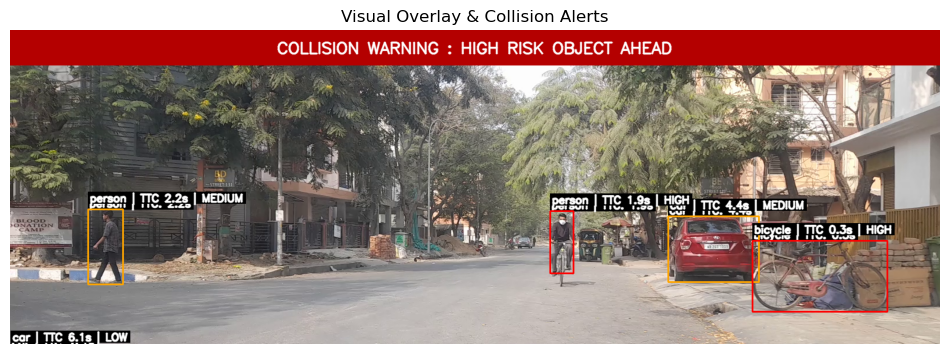

In [63]:
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(final_vis, cv2.COLOR_BGR2RGB))
plt.title("Visual Overlay & Collision Alerts")
plt.axis("off")
plt.show()